# **Handwritten Digit Recognition Model**

In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu') #device config

inp_size=784 #hyper parameters
hidd_size=500
num_classes=10
num_epochs=50
batch_size=100
lear_rate=0.001
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True) #MNIST dataset
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True) #shuffle true as avoids pattern memorization
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False) #while testing, want to check efficiency
ex_data, ex_targets = next(iter(test_loader)) #batch input data and target data

class NeuralNetwork(nn.Module): #design model
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNetwork,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)
  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out) #no activation and softmax at the end as crossentropyloss needs raw value
    return out
model=NeuralNetwork(inp_size,hidd_size,num_classes).to(device)

criterion=nn.CrossEntropyLoss() #loss and optimizer
optimizer=torch.optim.Adam(model.parameters(),lr=lear_rate)

ntotsteps=len(train_loader) #training loop
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step() #update weights
    optimizer.zero_grad()
    if (i+1)%100==0:
      print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{ntotsteps}], Loss: {loss.item()}")

Epoch [1/50], Step [100/600], Loss: 0.35951682925224304
Epoch [1/50], Step [200/600], Loss: 0.4348367750644684
Epoch [1/50], Step [300/600], Loss: 0.25184258818626404
Epoch [1/50], Step [400/600], Loss: 0.14750151336193085
Epoch [1/50], Step [500/600], Loss: 0.09185905754566193
Epoch [1/50], Step [600/600], Loss: 0.10715942084789276
Epoch [2/50], Step [100/600], Loss: 0.08736006915569305
Epoch [2/50], Step [200/600], Loss: 0.1479598581790924
Epoch [2/50], Step [300/600], Loss: 0.11540376394987106
Epoch [2/50], Step [400/600], Loss: 0.1534421294927597
Epoch [2/50], Step [500/600], Loss: 0.1150631532073021
Epoch [2/50], Step [600/600], Loss: 0.12144412100315094
Epoch [3/50], Step [100/600], Loss: 0.09463109821081161
Epoch [3/50], Step [200/600], Loss: 0.06898201256990433
Epoch [3/50], Step [300/600], Loss: 0.10925927758216858
Epoch [3/50], Step [400/600], Loss: 0.110145702958107
Epoch [3/50], Step [500/600], Loss: 0.11700320243835449
Epoch [3/50], Step [600/600], Loss: 0.0359172485768795

Enter a number: 9
Prediction: 9


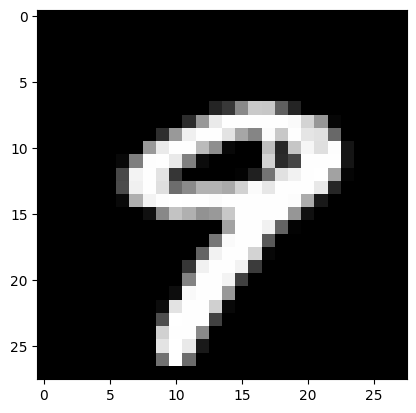

In [16]:
digit=int(input("Enter a number: "))
model.eval() #model in eval mode
images,labels=test_dataset[digit]
images=images.view(1,-1).to(device) #flatten input image
output=model(images)
predicted=output.argmax(dim=1,keepdim=True).item()
print(f"Prediction: {predicted}")
img=images.view(28,28).cpu().numpy() #flattened image back to original shape
plt.imshow(img,cmap='gray')
plt.show()